<a href="https://colab.research.google.com/github/technomancerAdarsh/Austrailan-Flight-1997-2022/blob/main/Australian_flights_2003_2022_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [245]:
#loading dataset
url='https://raw.githubusercontent.com/technomancerAdarsh/Austrailan-Flight-1997-2022/main/dataset.csv'


In [246]:
flight=pd.read_csv(url)
flight.head()

,_id,Month,In_Out,Australian_City,International_City,Airline,Route,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num
0,1,Sep-03,I,Adelaide,Denpasar,Garuda Indonesia,DPS-ADL-MEL,Indonesia,SE Asia,Indonesia,SE Asia,0,13,3809,2003,9
1,2,Sep-03,I,Adelaide,Hong Kong,Cathay Pacific Airways,HKG-ADL-MEL,Hong Kong (SAR),NE Asia,Hong Kong (SAR),NE Asia,0,8,2008,2003,9
2,3,Sep-03,I,Adelaide,Kuala Lumpur,Malaysia Airlines,KUL-ADL,Malaysia,SE Asia,Malaysia,SE Asia,0,17,4726,2003,9
3,4,Sep-03,I,Adelaide,Singapore,Qantas Airways,SIN-DRW-ADL-MEL,Singapore,SE Asia,Singapore,SE Asia,1,4,908,2003,9
4,5,Sep-03,I,Adelaide,Singapore,Qantas Airways,SIN-DRW-ADL-SYD,Singapore,SE Asia,Singapore,SE Asia,1,9,2038,2003,9


In [247]:
flight.shape

(110055, 16)

In [248]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110055 entries, 0 to 110054
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   _id                 110055 non-null  int64 
 1   Month               110055 non-null  object
 2   In_Out              110055 non-null  object
 3   Australian_City     110055 non-null  object
 4   International_City  110055 non-null  object
 5   Airline             110055 non-null  object
 6   Route               110055 non-null  object
 7   Port_Country        110055 non-null  object
 8   Port_Region         110055 non-null  object
 9   Service_Country     110055 non-null  object
 10  Service_Region      110055 non-null  object
 11  Stops               110055 non-null  int64 
 12  All_Flights         110055 non-null  int64 
 13  Max_Seats           110055 non-null  int64 
 14  Year                110055 non-null  int64 
 15  Month_num           110055 non-null  int64 
dtypes:

In [249]:
flight.isna().sum()

_id                   0
Month                 0
In_Out                0
Australian_City       0
International_City    0
Airline               0
Route                 0
Port_Country          0
Port_Region           0
Service_Country       0
Service_Region        0
Stops                 0
All_Flights           0
Max_Seats             0
Year                  0
Month_num             0
dtype: int64

In [250]:
flight.duplicated().sum()

0

In [251]:
flight[flight['Year']==2003]['Month_num'].unique()


array([ 9, 12])

### data is already cleaned so we can directly jump to visulization

# **Data Visualization**

In [252]:
#Average number of flights per months

In [253]:
total_flights_per_month=flight.groupby('Month_num')[['Year']].count().rename(columns={'Year':'Count'})
total_flights_per_month

,Count
Month_num,
1,9155
2,8948
3,10187
4,8514
5,8519
6,9960
7,8800
8,8606
9,10490


In [254]:
df=flight.groupby(['Year','Month_num'])[['All_Flights']].sum().reset_index(level='Month_num')
df

,Month_num,All_Flights
Year,,
2003,9,9591
2003,12,10863
2004,3,10917
2004,6,10816
2004,9,11238
...,...,...
2022,5,6589
2022,6,7584
2022,7,9788


In [255]:
Avg_month=df.groupby('Month_num')['All_Flights'].sum()/df['Month_num'].value_counts()
Avg_month

1     14407.588235
2     12394.117647
3     12884.947368
4     12350.941176
5     12254.764706
6     12105.210526
7     13368.000000
8     13001.000000
9     12402.350000
10    13290.812500
11    12829.125000
12    13877.631579
dtype: float64

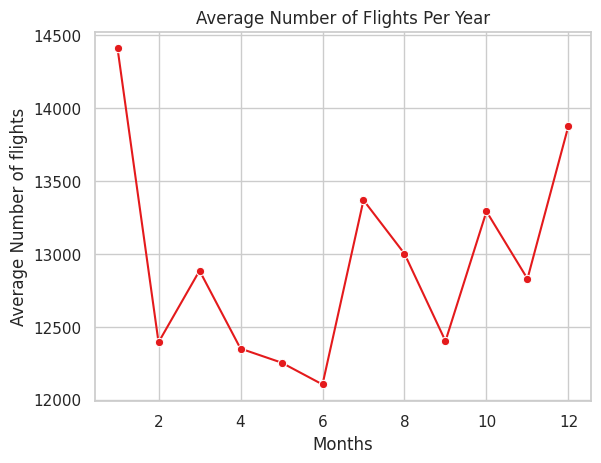

In [291]:
plt.grid(True)
sns.lineplot(x=Avg_month.index,y=Avg_month.values,marker='o')
plt.xlabel("Months")
plt.ylabel("Average Number of flights")
plt.title("Average Number of Flights Per Year")
plt.show()

#### from the above graph we can colnclude that the number of flights are maximum during new years time so this could be help in taxi driver businesses

In [257]:
# the city which has most no of International flights

data=flight.groupby(['Australian_City','In_Out'])['Month_num'].count()
data

Australian_City   In_Out
Adelaide          I          1559
                  O          1510
Brisbane          I         10393
                  O         10039
Cairns            I          2222
                  O          2215
Canberra          I            92
                  O            90
Christmas Island  I             8
                  O             8
Darwin            I          1240
                  O          1233
Gold Coast        I          1955
                  O          1954
Hobart            I             7
                  O             7
Melbourne         I         11813
                  O         11912
Newcastle         I             8
                  O             8
Norfolk Island    I           159
                  O           159
Perth             I          4526
                  O          4671
Port Hedland      I            68
                  O            68
Sunshine Coast    I            41
                  O            41
Sydney            I    

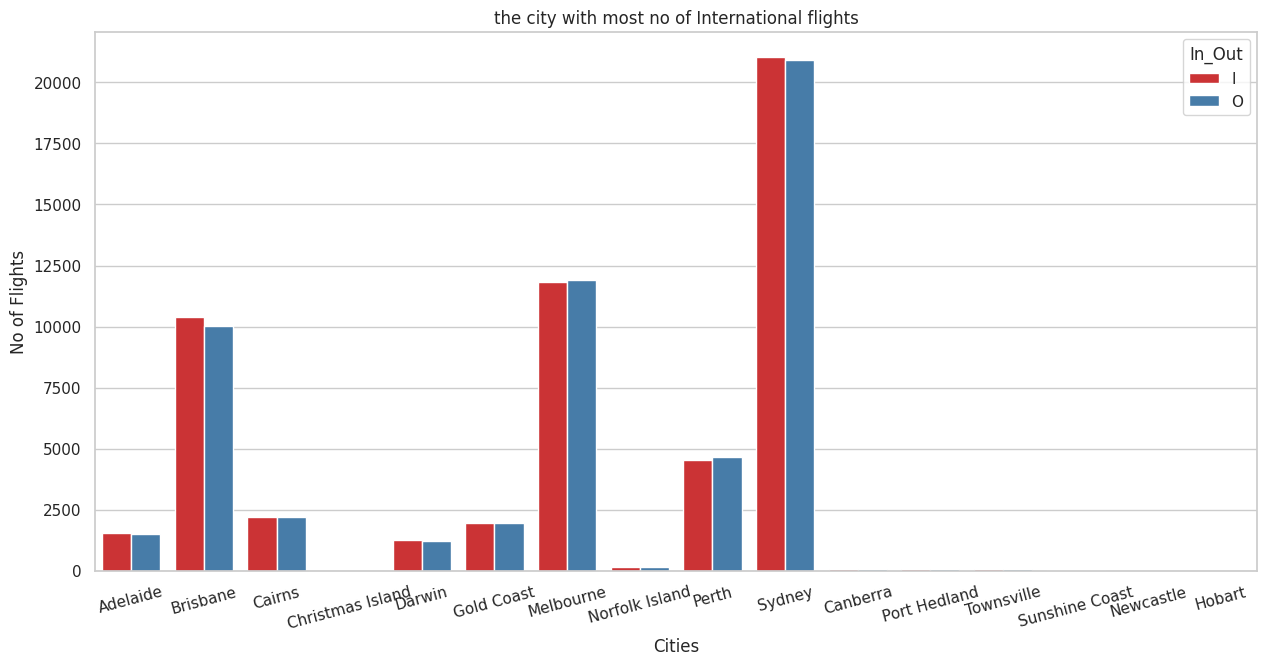

In [290]:
plt.figure(figsize=(15,7))
sns.countplot(data=flight,x='Australian_City',hue='In_Out')
plt.xlabel("Cities")
plt.ylabel("No of Flights")
plt.xticks(rotation=15)
plt.title("the city with most no of International flights")
plt.show()




In [259]:

#Top 5 airline has most number of flight running

Top_5_Airlines=flight['Airline'].value_counts().head()

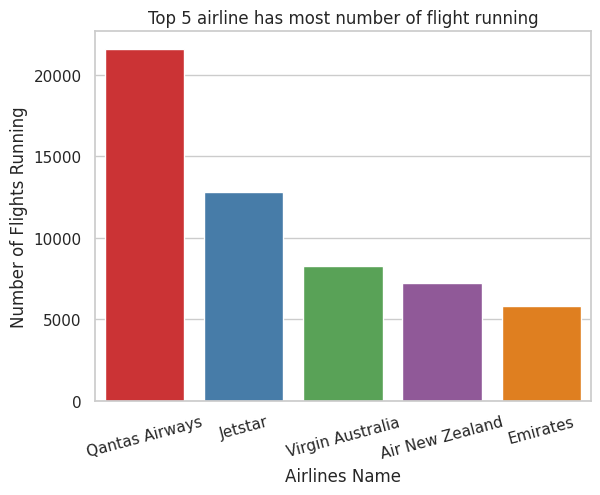

In [289]:
sns.set_palette('Set1')
sns.barplot( x=Top_5_Airlines.index ,y=Top_5_Airlines.values )
plt.xlabel("Airlines Name")
plt.ylabel("Number of Flights Running")
plt.title("Top 5 airline has most number of flight running")
plt.xticks(rotation=15)
plt.show()

In [261]:
#top 5 most busiet Route
Top_5_Routes=flight['Route'].value_counts().head()

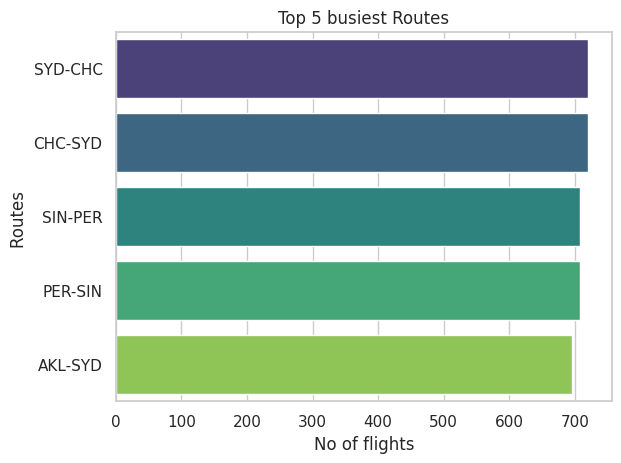

In [287]:
sns.barplot(y=Top_5_Routes.index , x=Top_5_Routes.values, palette='viridis')
plt.xlabel("No of flights")
plt.ylabel("Routes ")
plt.title("Top 5 busiest Routes")
plt.show()

In [263]:
#top5 Regions which has most number of flights outging
Outgoing=flight[flight['In_Out']=='O']
Region=Outgoing.groupby(['Port_Region'])['Month_num'].count().sort_values(ascending=False).head()
Region



Port_Region
SE Asia        16525
NE Asia        10770
New Zealand    10570
Islands         6162
N America       4796
Name: Month_num, dtype: int64

In [264]:
chart = px.bar(x=Region.index, y=Region.values)
chart.update_layout(
    xaxis_title=" Region",
    yaxis_title="Number of flights ",
)

chart.show()

In [265]:
flight['Stops'].unique()

array([0, 1, 2, 3])

##### Assuming all seats are occupied in Flight

In [266]:
# the trend of passengers travelling

total_passengers=flight.groupby('Year')[['Max_Seats']].mean().rename(columns={'Max_Seats':'Average No Seats'})
total_passengers['Average No Seats']=total_passengers['Average No Seats'].round()
total_passengers


,Average No Seats
Year,
2003,4987.0
2004,5352.0
2005,5505.0
2006,5662.0
2007,5822.0
2008,5874.0
2009,6007.0
2010,6026.0
2011,6349.0


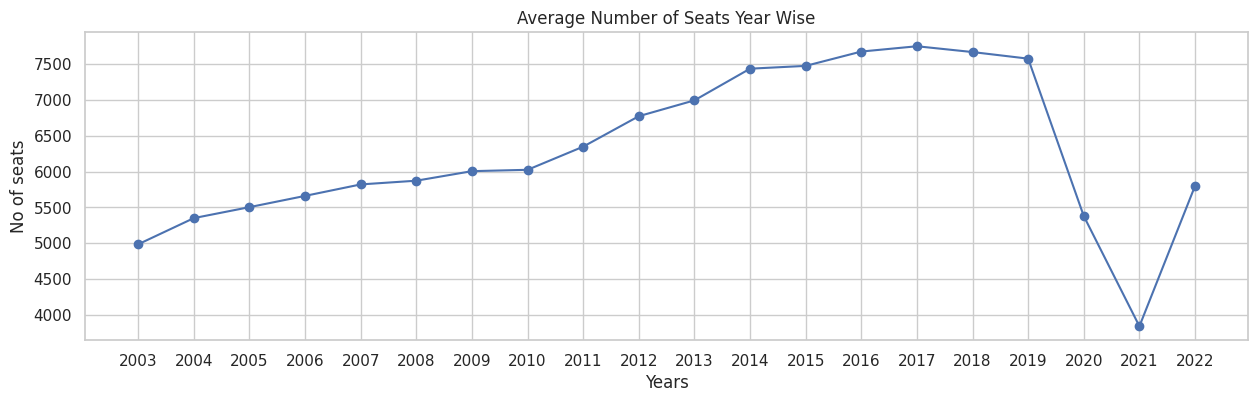

In [285]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,4))
plt.plot(total_passengers.index, total_passengers['Average No Seats'], marker='o', linestyle='-')
plt.xlabel("Years")
plt.ylabel("No of seats")
plt.title("Average Number of Seats Year Wise")
plt.xticks(total_passengers.index)
plt.show()

In [268]:
flight.head(2)

,_id,Month,In_Out,Australian_City,International_City,Airline,Route,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num
0,1,Sep-03,I,Adelaide,Denpasar,Garuda Indonesia,DPS-ADL-MEL,Indonesia,SE Asia,Indonesia,SE Asia,0,13,3809,2003,9
1,2,Sep-03,I,Adelaide,Hong Kong,Cathay Pacific Airways,HKG-ADL-MEL,Hong Kong (SAR),NE Asia,Hong Kong (SAR),NE Asia,0,8,2008,2003,9


In [269]:
# number of flights less than 3 stops
no_of_stops=flight[flight['Stops']!=3]['Stops'].value_counts()

In [270]:
no_of_stops

0    92974
1    16292
2      779
Name: Stops, dtype: int64

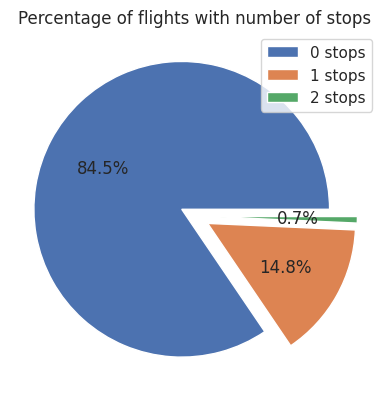

In [271]:
# a pie chart

plt.title('Percentage of flights with number of stops')
plt.pie(no_of_stops,autopct='%.1f%%',
        explode=[0.1,0.1,0.1],
        labeldistance=1.1)
plt.legend(labels=['0 stops','1 stops','2 stops'])
plt.show()

In [272]:
# seats per flight
flight['seats_per_flight']= flight['Max_Seats']/flight['All_Flights']


In [273]:
flight['seat_cat']=pd.cut(flight['seats_per_flight'],bins=[0,120,200,400,600])

In [274]:
flight.head(2)

,_id,Month,In_Out,Australian_City,International_City,Airline,Route,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num,seats_per_flight,seat_cat
0,1,Sep-03,I,Adelaide,Denpasar,Garuda Indonesia,DPS-ADL-MEL,Indonesia,SE Asia,Indonesia,SE Asia,0,13,3809,2003,9,293.0,"(200, 400]"
1,2,Sep-03,I,Adelaide,Hong Kong,Cathay Pacific Airways,HKG-ADL-MEL,Hong Kong (SAR),NE Asia,Hong Kong (SAR),NE Asia,0,8,2008,2003,9,251.0,"(200, 400]"


In [275]:
seat_cat=flight['seat_cat'].value_counts().sort_values(ascending=False)

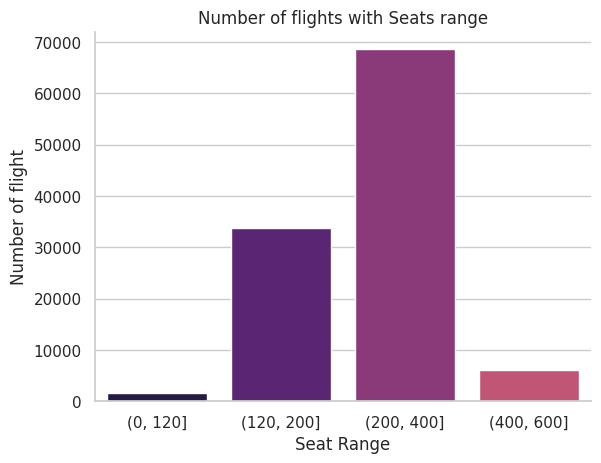

In [276]:
sns.set_palette('magma')
sns.barplot(x=seat_cat.index,
            y=seat_cat.values)
plt.title('Number of flights with Seats range')
plt.xlabel('Seat Range')
plt.ylabel('Number of flight')
sns.despine()
plt.show()

In [277]:
flight['seat_cat']=flight['seat_cat'].astype(str)

In [278]:
top_flights=flight[(flight['seat_cat']=='(200, 400]') & (flight['Stops']==0)]['Airline'].value_counts().nlargest(5)

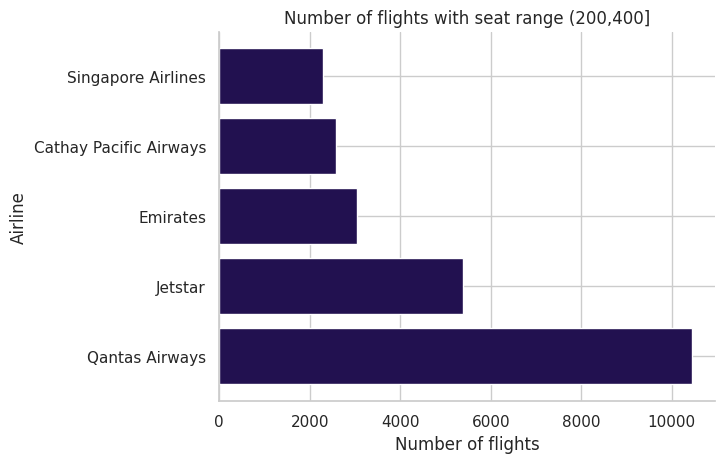

In [279]:
plt.title('Number of flights with seat range (200,400]')
plt.xlabel('Number of flights')
plt.ylabel('Airline')
plt.barh(y=top_flights.index,
         width=top_flights.values)
sns.despine()
plt.show()

In [280]:
flight.columns

Index(['_id', 'Month', 'In_Out', 'Australian_City', 'International_City',
       'Airline', 'Route', 'Port_Country', 'Port_Region', 'Service_Country',
       'Service_Region', 'Stops', 'All_Flights', 'Max_Seats', 'Year',
       'Month_num', 'seats_per_flight', 'seat_cat'],
      dtype='object')

In [281]:
flight.head(2)

,_id,Month,In_Out,Australian_City,International_City,Airline,Route,Port_Country,Port_Region,Service_Country,Service_Region,Stops,All_Flights,Max_Seats,Year,Month_num,seats_per_flight,seat_cat
0,1,Sep-03,I,Adelaide,Denpasar,Garuda Indonesia,DPS-ADL-MEL,Indonesia,SE Asia,Indonesia,SE Asia,0,13,3809,2003,9,293.0,"(200, 400]"
1,2,Sep-03,I,Adelaide,Hong Kong,Cathay Pacific Airways,HKG-ADL-MEL,Hong Kong (SAR),NE Asia,Hong Kong (SAR),NE Asia,0,8,2008,2003,9,251.0,"(200, 400]"


In [282]:
# most popular city by country

In [283]:
popular_city=flight.groupby(['Port_Country','International_City'])[['All_Flights']].sum().reset_index().nlargest(columns='All_Flights',n=10)
popular_city

,Port_Country,International_City,All_Flights
62,New Zealand,Auckland,371125
77,Singapore,Singapore,363522
40,Indonesia,Denpasar,178710
35,Hong Kong (SAR),Hong Kong,169726
55,Malaysia,Kuala Lumpur,137786
63,New Zealand,Christchurch,132685
100,United Arab Emirates,Dubai,118793
94,USA,Los Angeles,103101
84,Thailand,Bangkok,93697
69,New Zealand,Wellington,88978


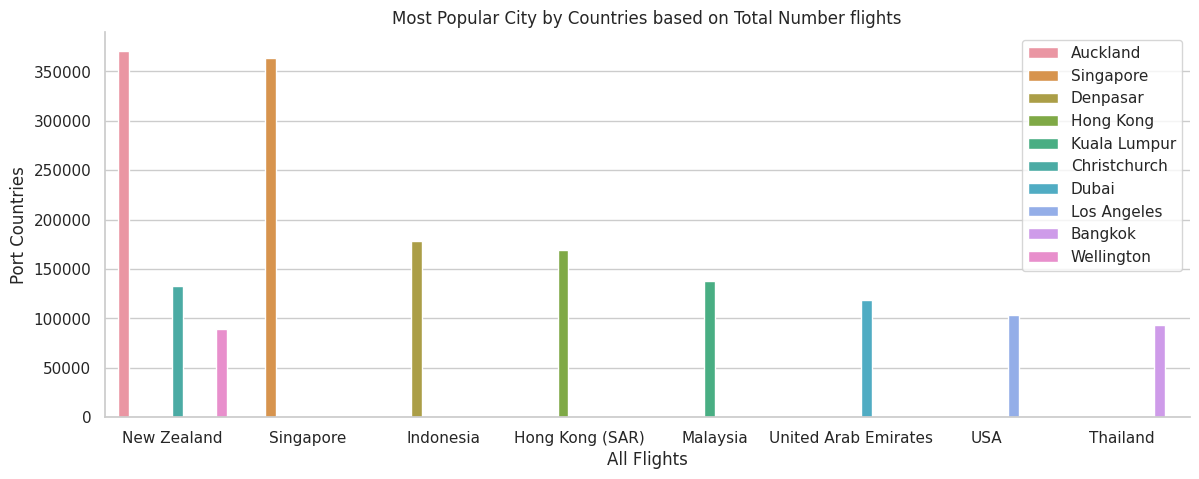

In [284]:
plt.figure(figsize=(14,5))
sns.barplot(data=popular_city,
            x='Port_Country',
            y='All_Flights',
            hue='International_City')
plt.legend(loc='upper right')
plt.xlabel("All Flights")
plt.ylabel("Port Countries")
plt.title("Most Popular City by Countries based on Total Number flights")
sns.despine()
plt.show()